# Investment Management
## Returns

In [1]:
prices_a = [8.7, 8.91, 8.71]

In [2]:
# Returns from first day to second day

(prices_a[1]/prices_a[0]) - 1

0.024137931034482918

In [3]:
# What about the next day?

(prices_a[2]/prices_a[1]) - 1

-0.022446689113355678

In [4]:
# from index 1 til the end of the list
prices_a[1:]

[8.91, 8.71]

In [5]:
# everything in list except final element
prices_a[:-1]

[8.7, 8.91]

Now, we are at a stage where we can't do certain operations (like division) between our lists.


---


We will import **numpy** to help us, as it will let us do vector math with arrays.

In [6]:
import numpy as np

In [7]:
prices_a = np.array([8.7, 8.91, 8.71])

In [8]:
prices_a

array([8.7 , 8.91, 8.71])

In [9]:
prices_a[1:]/prices_a[:-1] - 1

array([ 0.02413793, -0.02244669])

Wow, look! We have calculated our returns using the sliced array data! Numpy is so coooool!


---

But wait, there is something better... **PANDAS**. It is a wrapper for Numpy, whatever that means.


In [10]:
import pandas as pd

## DataFrames

In [11]:
# Let's make a dictionary with some stuff in it.
prices = pd.DataFrame({"BLUE": [8.7, 8.91, 8.71, 8.43, 8.73],
                       "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]})

What is a **dataframe**? A data structure that is a matrix (rows and columns). You can index each row and column.

In [12]:
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


So can we simply divide like the below to get our returns? NO. Alignment issues happen due to indexing in the DataFrame.

In [13]:
prices.iloc[1:]/prices.iloc[:-1] -1 # wrong way to do

,BLUE,ORANGE
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,NaN,NaN


**One way:** Dividing without the index info basically - this is one way to work around the above not giving what we want

In [14]:
prices.iloc[1:].values/prices.iloc[:-1] - 1 # one way to do it. as long as one the things in the equation doesn't have indices, it'll work.

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


**Another better way:** We can divide prices by prices shifted by 1 - 1 to get the returns from our DataFrame. Notice that the first row is NaN as we have no returns for the very first day.

In [15]:
prices/prices.shift(1) - 1

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


But that was a little annoying! **The best way:** There is actually a method called **pct_change** (percentage change) that we can call on our DataFrame.

In [16]:
prices.pct_change()

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [17]:
returns = prices.pct_change()  # we might as well save it
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


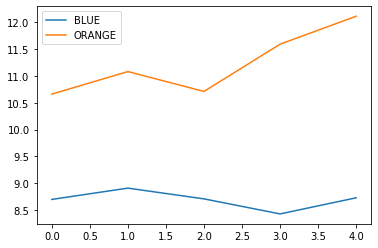

In [18]:
prices.plot()

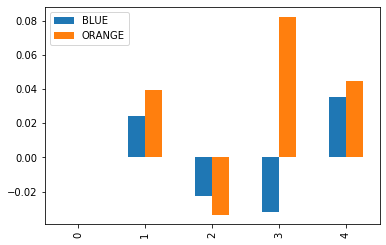

In [19]:
returns.plot.bar()

In [20]:
returns.std()

BLUE      0.033565
ORANGE    0.048328
dtype: float64

In [21]:
returns.mean()

BLUE      0.001283
ORANGE    0.033260
dtype: float64

In [22]:
returns + 1  # vector addition

,BLUE,ORANGE
0,NaN,NaN
1,1.024138,1.039400
2,0.977553,0.966606
3,0.967853,1.082166
4,1.035587,1.044866


##np.prod

Calculation of compounded returns using np.prod. First, it will use vector addition to add 1 to each element in returns. Then, it will multiply all the elements of each column, then it will subtract 1.

In [23]:
np.prod(returns + 1) - 1

BLUE      0.003448
ORANGE    0.136023
dtype: float64

In [24]:
(returns+1).prod()-1

BLUE      0.003448
ORANGE    0.136023
dtype: float64

In [25]:
((returns+1).prod()-1)*100

BLUE       0.344828
ORANGE    13.602251
dtype: float64

In [26]:
(((returns+1).prod()-1)*100).round(2)

BLUE       0.34
ORANGE    13.60
dtype: float64

## Annualization


In [27]:
rm = 0.01
((1+rm)**12) - 1

0.12682503013196977

In [28]:
rq = 0.04
((1+rm)**4) - 1

0.040604010000000024

In [29]:
rd = 0.0001
((1+rd)**252) - 1   # b/c 252 trading days

0.025518911987694626

#Volatility

We compute the **avg of the square of the deviations from the mean** - this is called ***variance***. (r with bar is the arithmetic mean of the returns).

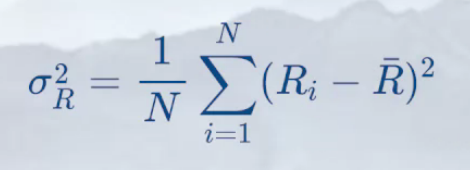

However, we use ***standard deviation*** to compare across returns, rather than the variance.

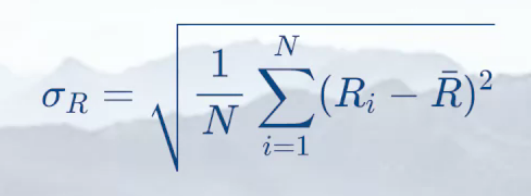

## Annualizing volatility

We cannot compare data from  daily vol. vs. monthly vol. - so we must annualize.

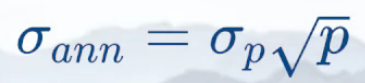

In [30]:
# std dev of a period = std dev for that period times sq root of number of that period in a year e.g. 252 for daily, 12 for monthly.

## Risk-Adjusted Returns

First, going to import data used in the course.

In [34]:
# Storing the file data as a new DataFrame
priceData = pd.read_csv('data/sample_prices.csv')

In [35]:
priceData

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [36]:
returns = priceData.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [37]:
returns = returns.dropna()
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [38]:
returns.std()   # with inbuilt

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [39]:
# doing std dev w/o inbuilt
difference = returns - returns.mean()
std = np.sqrt(np.sum(difference**2)/(len(returns)-1))  # NOTE: Instead of len, could use .shape[0] to check # of observations.
std

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [40]:
returns.shape

(12, 2)

Example of annualizing monthly returns

In [41]:
returns.std()*np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

##Lab Session: Risk Adjusted Returns

In [47]:
# Storing the file data as a new DataFrame
monthlyData = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv',
                          header=0, # tells it that row 0 has the header values
                          index_col=0, # tells it that the 1st column can be used as index values - convenient in this case since they're dates
                          parse_dates=True,  
                          na_values=-99.99) # replaces a defined value as NaNs

In [48]:
monthlyData

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201808,NaN,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
201809,NaN,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
201810,NaN,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
201811,NaN,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53


Let's say we want to only work with the columns we care about. We can pull them out using the column header names, like this, if we want.

In [49]:
columns = ['Lo 10', 'Hi 10']
monthlyData = monthlyData[columns]
monthlyData.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


Fama French data contains the actual percents already (i.e. multipled by 100).

We can divide them all by 100 to work with returns in a more raw state.

In [50]:
monthlyData = monthlyData/100
monthlyData.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


Renaming columns

In [51]:
monthlyData.columns = ['SmallCap', 'LargeCap']
monthlyData.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


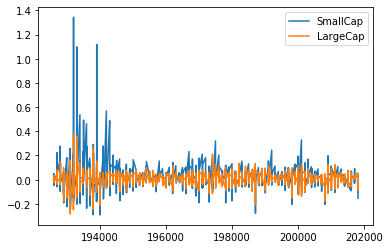

In [52]:
monthlyData.plot()   # same as doing .plot.line() as line is default

In [53]:
monthlyData.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

Annualizing the monthly volatility

In [54]:
annualized_vol = monthlyData.std() * np.sqrt(12)
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [55]:
n_months = monthlyData.shape[0]
return_per_month = ((monthlyData+1).prod()**(1/n_months)) - 1  # Kinda like inverse of annualization. 
return_per_month                                               # What's the return per month that would have given me that return over the total period? 

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

Yo! That is a geometric mean!

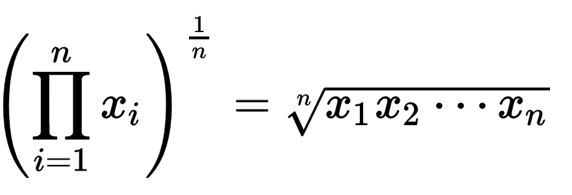

In [56]:
annualized_return = (return_per_month + 1)**12 - 1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [57]:
# Alternative way if you want to use the same code for annualizing different periods: just update numerator from 1
annualized_return = ((monthlyData+1).prod()**(12/n_months)) - 1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [58]:
return_per_qtr = ((monthlyData+1).prod()**(3/n_months)) - 1  # What if we want quarterly? 
return_per_qtr

SmallCap    0.039467
LargeCap    0.022436
dtype: float64

## Sharpe Ratio

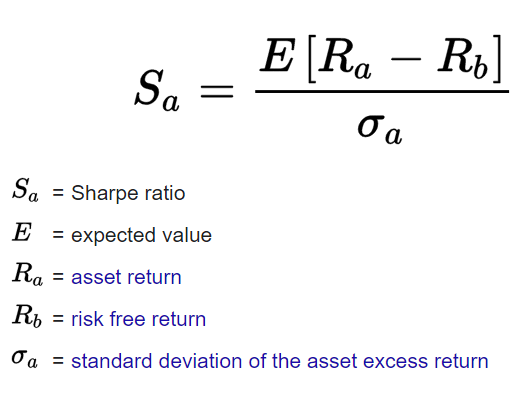

In [59]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

# Drawdown

**Max Drawdown:** The *maximum loss* from the previous high to a subsequent low, or theoretical loss you would have sustained if you had invested at the peak and sold at the trough.


Things to watch out for with drawdowns:

*   Very sensitive to outliers
*   They depend on freq of observations, a daily or weekly drawdown might completely disappear or move based on monthly data





###Constructing a Wealth Index

1.   Computing Drawdowns
2.   Look at the prior peak at any point in time & plot the drawdowns to see how long it takes to recover


## Compute Drawdowns

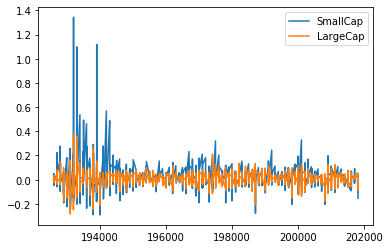

In [60]:
monthlyData.plot()

In [61]:
monthlyData.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [62]:
monthlyData.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [63]:
monthlyData.index = pd.to_datetime(monthlyData.index, format="%Y%m")
monthlyData.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [64]:
# But we don't want the -01 appended on each date index.
monthlyData.index = monthlyData.index.to_period('M')  # Takes a series and converts it to a period, in this case M for month.
monthlyData.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


But why did we bother making it a time series of the data type datetime?

We can do lots of cool stuff with it!

In [65]:
monthlyData['1991']   # Can use shorthand to get some quick info!

,SmallCap,LargeCap
1991-01,0.0950,0.0529
1991-02,0.1550,0.0631
1991-03,0.1072,0.0222
1991-04,0.0559,-0.0032
1991-05,0.0240,0.0407
1991-06,-0.0269,-0.0469
1991-07,0.0287,0.0470
1991-08,0.0283,0.0297
1991-09,0.0145,-0.0178
1991-10,0.0267,0.0113


In [66]:
monthlyData.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


## Computing drawdowns

1. Compute a wealth index
2. Compute previous peaks
3. Compute drawdown as a percentage which is wealth value as a percentage of the previous peak

Step 1: Compute wealth index

In [67]:
# The wealth index is nothing more than the value of a portfolio as it compounds over time
wealth_index = 1000 * (1 + monthlyData["LargeCap"]).cumprod()

In [68]:
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

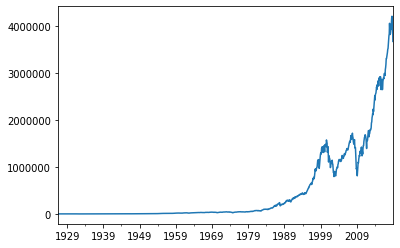

In [69]:
wealth_index.plot()

Step 2: Calc previous peaks

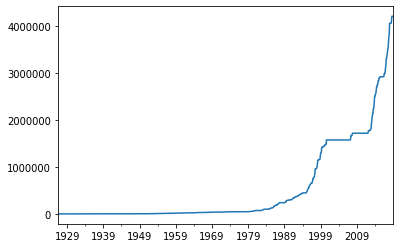

In [70]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

Step 3: Calc drawdown

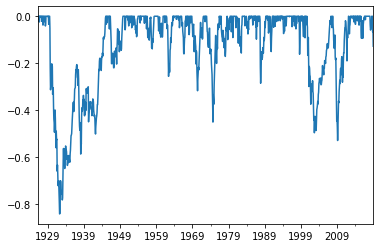

In [71]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [72]:
drawdown.min()       # biggest drawdown of all time


-0.8400375277943123

In [73]:
drawdown["1975":].min()    # biggest drawdown from 1975 onwards

-0.5280945042309304

In [74]:
drawdown = pd.DataFrame(drawdown)

drawdown.dtypes

LargeCap    float64
dtype: object

In [75]:
drawdown[drawdown['LargeCap']==drawdown['LargeCap'].min()]   # biggest drawdown from 1975 onwards

,LargeCap
1932-05,-0.840038


In [76]:
drawdown[['LargeCap']].min()

LargeCap   -0.840038
dtype: float64

In [77]:
drawdown["1975":].idxmin()     # finding the index of the period with the biggest drawdown

LargeCap    2009-02
dtype: period[M]

## Making our own function to calculate Drawdown!

In [78]:
def drawdown(return_series: pd.Series): 
    """
    Takes a time series of asset returns
    Computes and returns a DataFrame that contains:
      The wealth index
      Previous peaks
      Percent drawdowns
    """
    wealth_index = 1000 * (1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdown": drawdowns
    })

In [79]:
drawdown(monthlyData['LargeCap']).head().idxmin()




Wealth      1926-07
Peaks       1926-07
Drawdown    1926-10
dtype: period[M]

In [80]:
drawdown(monthlyData['LargeCap'])[['Wealth', 'Peaks']].head()

,Wealth,Peaks
1926-07,1032.900000,1032.900000
1926-08,1071.117300,1071.117300
1926-09,1078.293786,1078.293786
1926-10,1052.091247,1078.293786
1926-11,1080.497711,1080.497711


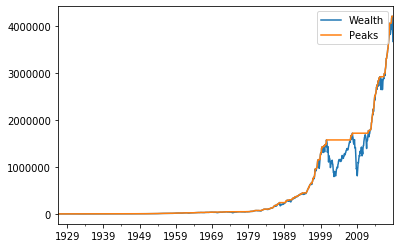

In [81]:
drawdown(monthlyData['LargeCap'])[['Wealth', 'Peaks']].plot()

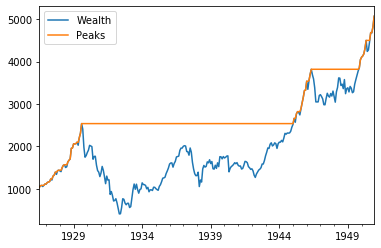

In [82]:
drawdown(monthlyData[:'1950']['LargeCap'])[['Wealth', 'Peaks']].plot()

In [83]:
monthlyData[['SmallCap', 'LargeCap']][monthlyData.index.year==2007]

,SmallCap,LargeCap
2007-01,0.0285,0.0184
2007-02,0.0060,-0.0156
2007-03,-0.0031,0.0119
2007-04,0.0220,0.0439
2007-05,0.0081,0.0369
2007-06,-0.0007,-0.0185
2007-07,-0.0463,-0.0302
2007-08,-0.0328,0.0172
2007-09,0.0143,0.0419
2007-10,0.0015,0.0215


In [84]:
drawdown(monthlyData["SmallCap"])["Drawdown"].min()

-0.8330007793945303

In [85]:
drawdown(monthlyData["LargeCap"])["Drawdown"].min()

-0.8400375277943123